# Agilex 5 AI-optimed DSP simulation with Video Kernels

## Dependencies

In [1]:
pip install cocotb numpy matplotlib wavedrom ipywidgets cocotb_kernel

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 75.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 75.2 MB/s eta 0:00:00
Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (767 kB)
  Created wheel for wavedrom: filename=wavedrom-2.0.3.post3-py2.py3-none

In [2]:
!python -m cocotb_kernel.install --sys-prefix

Installing cocotb kernelspec
Installed cocotb kernel to /home/lada/altera_pro/lic/board_001/.venv/share/jupyter/kernels/cocotb


## Build IP Source

With Quartus open a5e_dsp_example.qpf project

Go to Files in Project Navigator and open up the dsp_sim.ip

![My Diagram](./imgs/step1.jpg)

Run `Generate HDL...` to produce simulation files

![My Diagram](./imgs/step2.jpg)

Follow the configuration here before running `Generate`

![My Diagram](./imgs/step2.jpg)

Next run the following cmds here or in your terminal (need vsim on path, and license file in enviromental variable)

In [1]:
%cd ./dsp_sim/sim/mentor

/home/lada/altera_pro/aup/tmp/dsp_sim/sim/mentor


In [2]:
!vsim -c -do "do run_msim_setup.tcl"

Reading pref.tcl

# 2024.3

# do run_msim_setup.tcl
# ./../
# [exec] file_copy
# List Of Command Line Aliases
# 
# file_copy                                         -- Copy ROM/RAM files to simulation directory
# 
# dev_com                                           -- Compile device library files
# 
# com                                               -- Compile the design files in correct order
# 
# elab                                              -- Elaborate top level design
# 
# elab_debug                                        -- Elaborate the top level design with -voptargs=+acc option
# 
# ld                                                -- Compile all the design files and elaborate the top level design
# 
# ld_debug                                          -- Compile all the design files and elaborate the top level design with  -voptargs=+acc
# 
# 
# 
# List Of Variables
# 
# TOP_LEVEL_NAME                                    -- Top level module name.
#                         

## Cocotb Kernel Simulation

### Setup

Switch to the cocotb kernel in the jupyter controls.

In GUI:
* Add all objects as waves
* In transcript `run 1000ns`

In [1]:
import random
import cocotb
from cocotb.clock import Clock
from cocotb.triggers import Timer
from cocotb.triggers import RisingEdge
from cocotb.triggers import FallingEdge
from cocotb.triggers import ReadOnly
from cocotb.types import LogicArray
from cocotb.wavedrom import trace
import wavedrom
import ipywidgets

In [2]:
dut

HierarchyObject(dsp_sim with definition dsp_sim (at ../dsp_sim.vhd))

In [3]:
dut.clk

ModifiableObject(dsp_sim.clk)

In [4]:
dut.data_in_1.value = 0
dut.data_in_2.value = 1
dut.data_in_3.value = 2
dut.data_in_4.value = 3
dut.data_in_5.value = 4
dut.data_in_6.value = 5
dut.data_in_7.value = 6
dut.data_in_8.value = 7
dut.data_in_9.value = 8
dut.data_in_10.value = 9

In [5]:
dut.side_in_1.value = 0
dut.side_in_2.value = 0

In [6]:
dut.load_bb_one.value = 0
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1

In [7]:
clock = Clock(dut.clk, 5, units="ns")
cocotb.start_soon(clock.start(start_high=False))

<Task 1 created coro=start()>

In [8]:
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

### Define Kernels

kernel 1

In [9]:
B1C1 = 0x01
B2C1 = 0x02
B3C1 = 0x01
B4C1 = 0x0
B5C1 = 0x0
B6C1 = 0x0
B7C1 = 0xFF
B8C1 = 0xFE
B9C1 = 0xFF
B10C1= 0x0
SEC1 = 0x0

Kernel 2

In [10]:
B1C2 = 0x01
B2C2 = 0x0
B3C2 = 0xFF
B4C2 = 0x02
B5C2 = 0x0
B6C2 = 0xFE
B7C2 = 0x01
B8C2 = 0x0
B9C2 = 0xFF
B10C2= 0x0
SEC2 = 0x0

### Load Kernels

In [11]:
await FallingEdge(dut.clk)
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [12]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = 0
dut.side_in_2.value = SEC2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [13]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = 0
dut.side_in_2.value = SEC1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [14]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B5C2
dut.side_in_2.value = B10C2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [15]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B5C1
dut.side_in_2.value = B10C1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [16]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B4C2
dut.side_in_2.value = B9C2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [17]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B4C1
dut.side_in_2.value = B9C1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [18]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B3C2
dut.side_in_2.value = B8C2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [19]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B3C1
dut.side_in_2.value = B8C1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [20]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B2C2
dut.side_in_2.value = B7C2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [21]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B2C1
dut.side_in_2.value = B7C1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [22]:
dut.load_bb_one.value = 1
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B1C2
dut.side_in_2.value = B6C2
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [23]:
dut.load_bb_one.value = 0
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 1
dut.side_in_1.value = B1C1
dut.side_in_2.value = B6C1
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [24]:
dut.load_bb_one.value = 0
dut.load_bb_two.value = 0
dut.load_buf_sel.value = 0
dut.side_in_1.value = 0
dut.side_in_2.value = 0
await RisingEdge(dut.clk)

RisingEdge(ModifiableObject(dsp_sim.clk))

In [25]:
await Timer(1000, units="ns")

<Timer of 1000000.00ps at 0x7fffdc1ab310>

### Load Car Test Image

The Notebook has paused here!

In GUI:
* Look at the waveform to see how the kernels were loaded
* in transcript `run 400000ns`

In [24]:
pip install opencv-python

/usr/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=636403) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import cv2
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.12.0


In [27]:
!pwd

/home/lada/altera_pro/aup/tmp/dsp_sim/sim/mentor


/usr/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=653438) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [28]:
image = cv2.imread("../../../imgs/car.png", cv2.IMREAD_GRAYSCALE)

In [29]:
from PIL import Image as PILImage
from IPython.display import display

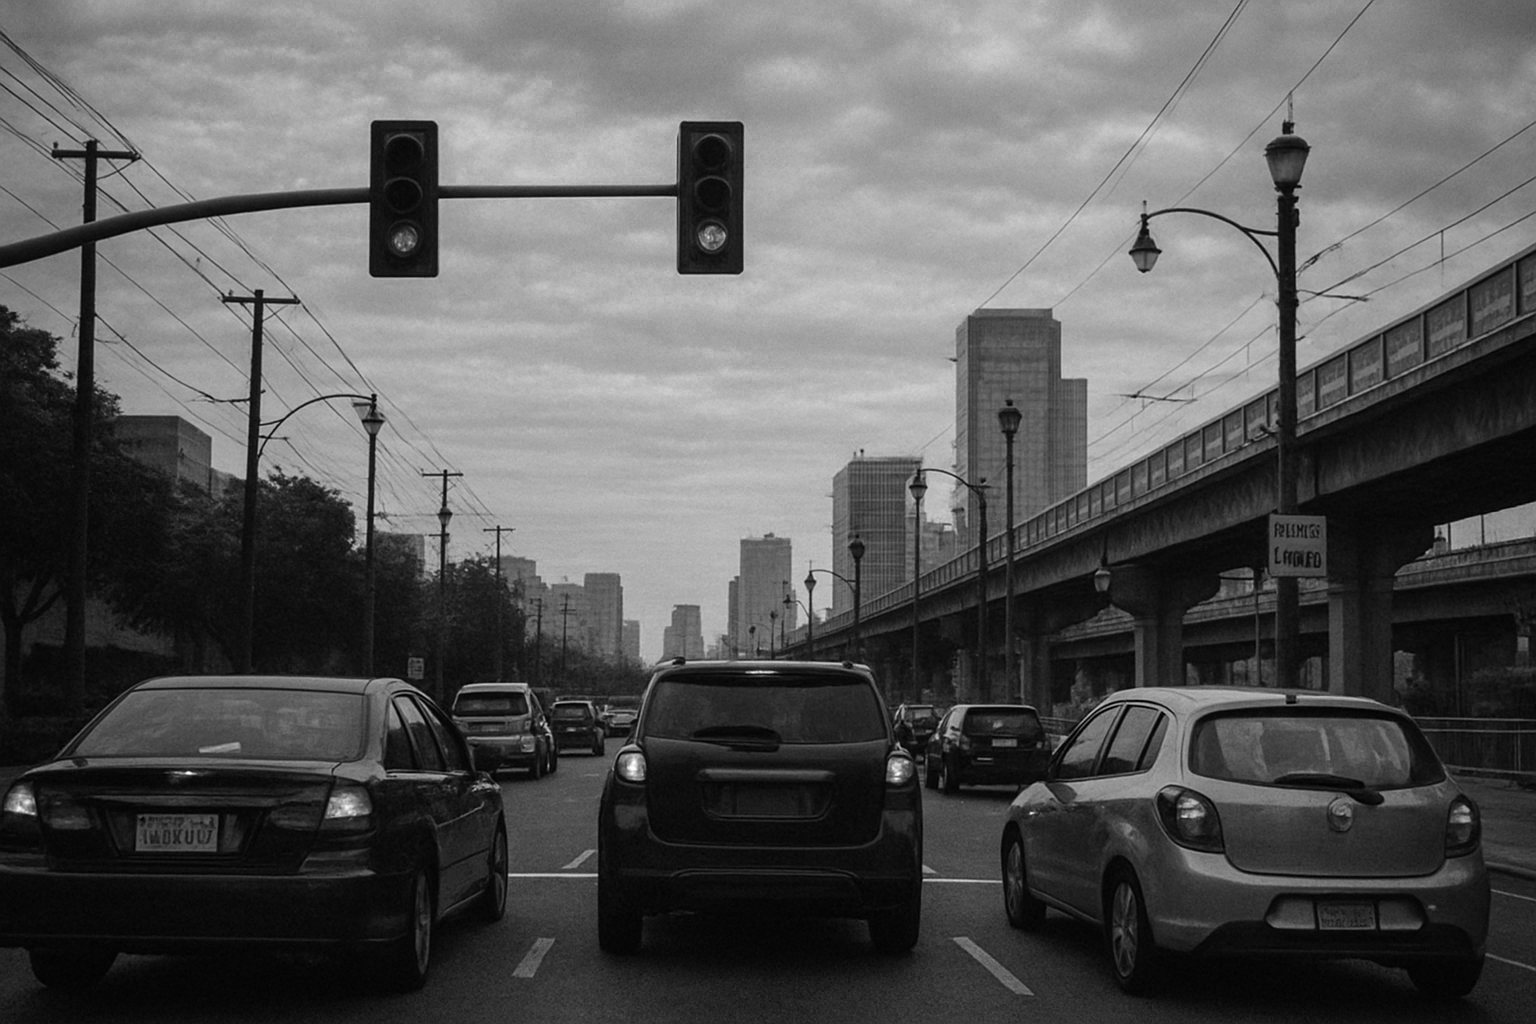

In [30]:
pil_img = PILImage.fromarray(image)
display(pil_img)

In [31]:
resized_image = cv2.resize(image, (320,200))

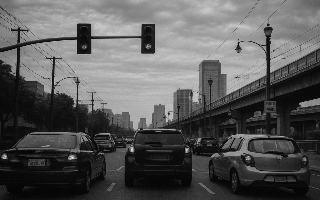

In [32]:
pil_img = PILImage.fromarray(resized_image)
display(pil_img)

In [33]:
image = resized_image

In [34]:
zero_clone_0 = np.zeros_like(image)

In [35]:
zero_clone_1 = np.zeros_like(image)

In [36]:
height, width = image.shape
new_image_index = 0

# Loop over all valid 3x3 windows centers (avoiding boarders)
for i in range(image.size):
    row = int(i / width)
    col = i % width

    # Skip corder pixels where 3x3 window would go out of bounds
    if row < 1 or row >= height - 1:
        continue
    if col < 1 or col >= width - 1:
        continue

    await RisingEdge(dut.clk)
    # Extract the 3x3 window centered at (row,col)
    window = image[row-1: row+2, col-1: col+2]
    dut.data_in_1.value = int(window[0][0])>>1
    dut.data_in_2.value = int(window[0][1])>>1
    dut.data_in_3.value = int(window[0][2])>>1
    dut.data_in_4.value = int(window[1][0])>>1
    dut.data_in_5.value = int(window[1][1])>>1
    dut.data_in_6.value = int(window[1][2])>>1
    dut.data_in_7.value = int(window[2][0])>>1
    dut.data_in_8.value = int(window[2][1])>>1
    dut.data_in_9.value = int(window[2][2])>>1
    new_image_index += 1
    if (new_image_index >= 5):
        await ReadOnly()
        index = new_image_index-5
        row = int(index / (width - 2))
        col = (index % (width-2))
        new_value = dut.fxp32_col_1.value.signed_integer
        if (new_value < 0):
            new_value = 0
        if (new_value > 255):
            new_value = 255
        zero_clone_0[row][col] = new_value
        new_value = dut.fxp32_col_2.value.signed_integer
        if (new_value < 0):
            new_value = 0
        if (new_value > 255):
            new_value = 255
        zero_clone_1[row][col] = new_value

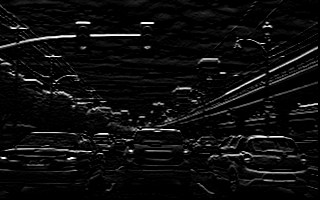

In [37]:
pil_img = PILImage.fromarray(zero_clone_0)
display(pil_img)

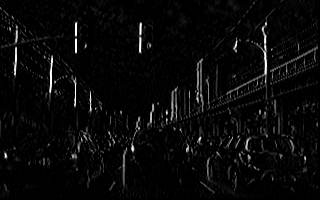

In [38]:
pil_img = PILImage.fromarray(zero_clone_1)
display(pil_img)

In [40]:
await Timer(100000, units="ns")

<Timer of 100000000.00ps at 0x7fffb5827810>

### Load 2nd Test Image

The Notebook has paused here!

In GUI:
* Look at the waveform to see how the data is processed in the DSP
* in transcript `run 400000ns`

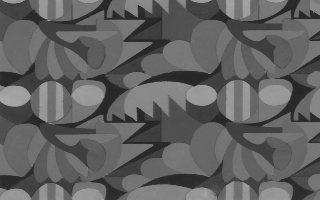

In [41]:
image = cv2.imread("../../../imgs/dsp_sim.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (320,200))
pil_img = PILImage.fromarray(image)
display(pil_img)

In [42]:
zero_clone_0 = np.zeros_like(image)
zero_clone_1 = np.zeros_like(image)

In [43]:
height, width = image.shape
new_image_index = 0

# Loop over all valid 3x3 windows centers (avoiding boarders)
for i in range(image.size):
    row = int(i / width)
    col = i % width

    # Skip corder pixels where 3x3 window would go out of bounds
    if row < 1 or row >= height - 1:
        continue
    if col < 1 or col >= width - 1:
        continue

    await RisingEdge(dut.clk)
    # Extract the 3x3 window centered at (row,col)
    window = image[row-1: row+2, col-1: col+2]
    dut.data_in_1.value = int(window[0][0])>>1
    dut.data_in_2.value = int(window[0][1])>>1
    dut.data_in_3.value = int(window[0][2])>>1
    dut.data_in_4.value = int(window[1][0])>>1
    dut.data_in_5.value = int(window[1][1])>>1
    dut.data_in_6.value = int(window[1][2])>>1
    dut.data_in_7.value = int(window[2][0])>>1
    dut.data_in_8.value = int(window[2][1])>>1
    dut.data_in_9.value = int(window[2][2])>>1
    new_image_index += 1
    if (new_image_index >= 5):
        await ReadOnly()
        index = new_image_index-5
        row = int(index / (width - 2))
        col = (index % (width-2))
        new_value = dut.fxp32_col_1.value.signed_integer
        if (new_value < 0):
            new_value = 0
        if (new_value > 255):
            new_value = 255
        zero_clone_0[row][col] = new_value
        new_value = dut.fxp32_col_2.value.signed_integer
        if (new_value < 0):
            new_value = 0
        if (new_value > 255):
            new_value = 255
        zero_clone_1[row][col] = new_value

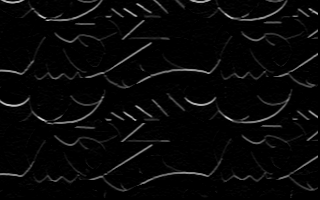

In [44]:
pil_img = PILImage.fromarray(zero_clone_0)
display(pil_img)

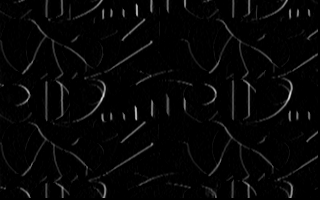

** Note: $finish
   Time: 790702500 ps  Iteration: 5  Instance: /dsp_sim


ERROR: called callback function threw exception
Traceback (most recent call last):
  File "/home/lada/altera_pro/lic/board_001/.venv/lib/python3.12/site-packages/cocotb/scheduler.py", line 385, in _react
    self._event_loop(trigger)
  File "/home/lada/altera_pro/lic/board_001/.venv/lib/python3.12/site-packages/cocotb/scheduler.py", line 488, in _event_loop
    self._schedule(coro, trigger=trigger)
  File "/home/lada/altera_pro/lic/board_001/.venv/lib/python3.12/site-packages/cocotb/scheduler.py", line 987, in _schedule
    state = ext.thread_wait()
            ^^^^^^^^^^^^^^^^^
  File "/home/lada/altera_pro/lic/board_001/.venv/lib/python3.12/site-packages/cocotb/scheduler.py", line 154, in thread_wait
    self.cond.wait()
  File "/usr/lib/python3.12/threading.py", line 355, in wait
    waiter.acquire()
  File "/home/lada/altera_pro/lic/board_001/.venv/lib/python3.12/site-packages/cocotb_kernel/module.py", line 42, in interrupt_kernel
    raise NotImplementedError("cocotb_kernel doesn'

In [45]:
pil_img = PILImage.fromarray(zero_clone_1)
display(pil_img)

All Done!